In [16]:
from os import listdir

import numpy as np

from PIL import Image

In [94]:
pics = np.array(sorted(listdir("rectified"))).reshape((17, 17))

def getUV(filename):
    data = filename.split("_")
    return float(data[3]), float(data[4][:-4])

In [74]:
arr = np.zeros((1024, 1024, 3),np.float)
A = 4
temp = 0
for i in range(17):
    for j in range(17):
        if (i-8)**2 + (j-8)**2 < A*A:
            pic = np.array(Image.open("rectified/" + pics[i][j]))
            arr += pic
            temp += 1

arr/= temp
arr = np.array(np.round(arr), dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("NoShift.jpg")

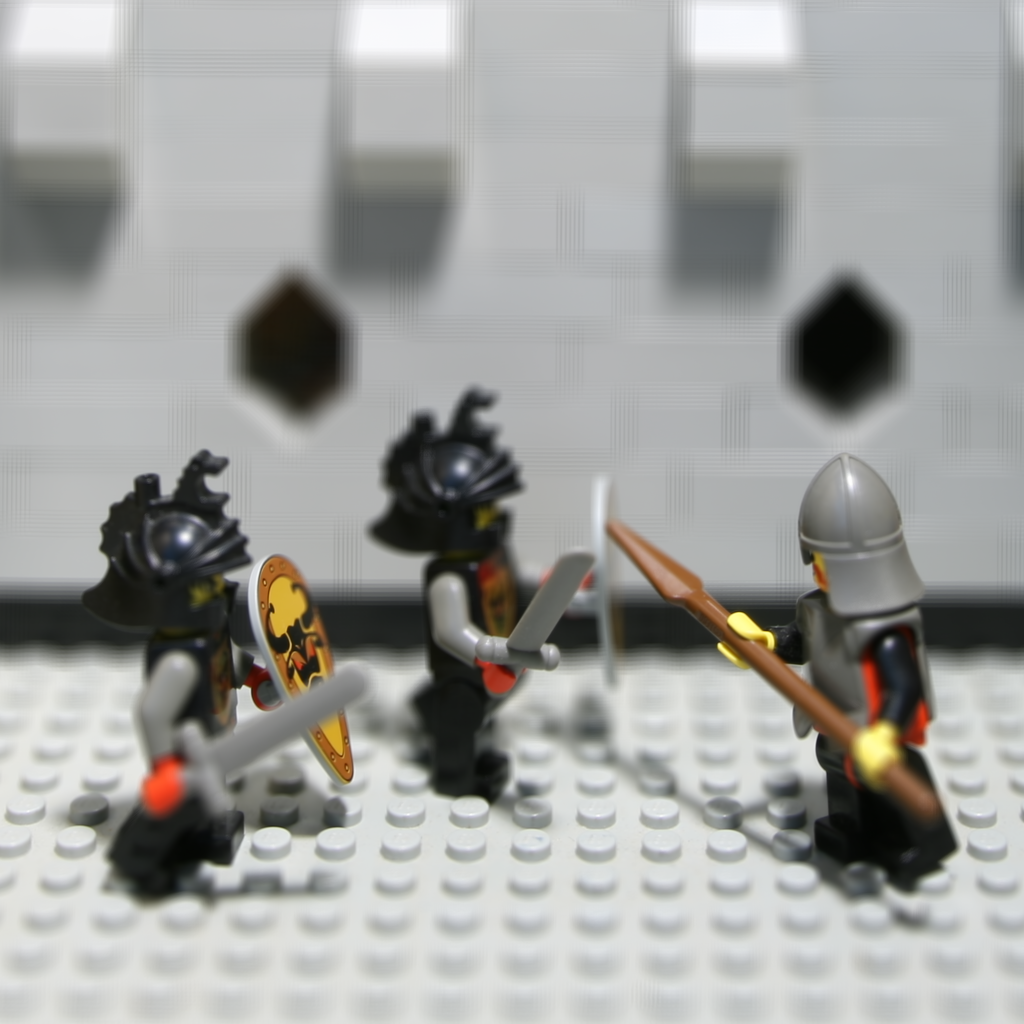

In [75]:
out

In [111]:
def calPic(focus, A):
    arr=np.zeros((1024, 1024, 3),np.float)

    temp = 0
    for i in range(17):
        for j in range(17):
            if (i-8)**2 + (j-8)**2 < A*A:
                uc, vc = getUV(pics[8][8])
                u, v = getUV(pics[i][j])
                f = int(focus * (u-uc))
                c = int(focus * (v-vc))

                img = Image.open("rectified/" + pics[i][j])
                img = img.transform(img.size, Image.AFFINE, (1, 0, c, 0, 1, f))
                pic = np.array(img)
                arr += pic
                temp += 1

    arr/= temp
    arr=np.array(np.round(arr),dtype=np.uint8)

    # Generate, save and preview final image
    out=Image.fromarray(arr,mode="RGB")
    out.save("Shift_" + str(focus) + "_" + str(A) + ".png")
    return out

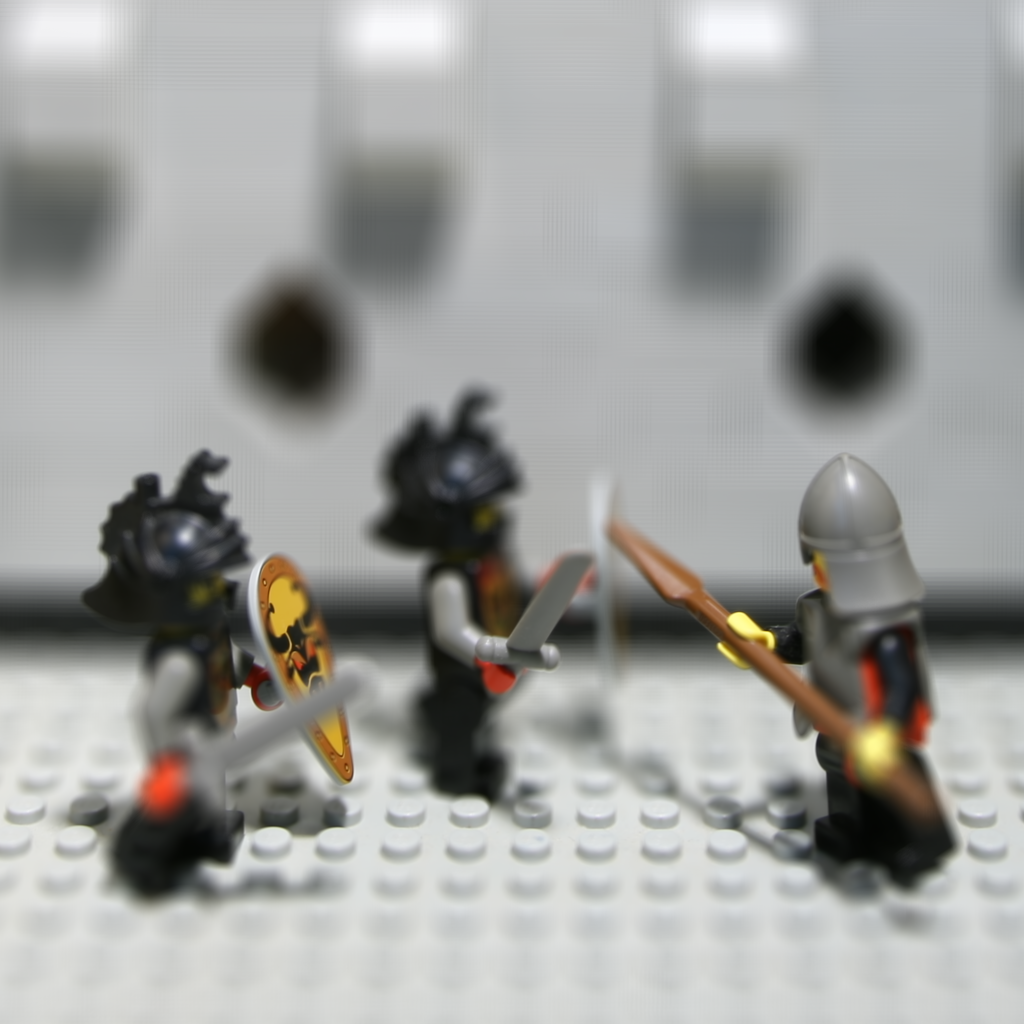

In [118]:
#Changing Aperture
calPic(0.0, 1)
calPic(0.0, 2)
calPic(0.0, 3)
calPic(0.0, 4)
calPic(0.0, 5)
calPic(0.0, 6)
calPic(0.0, 7)

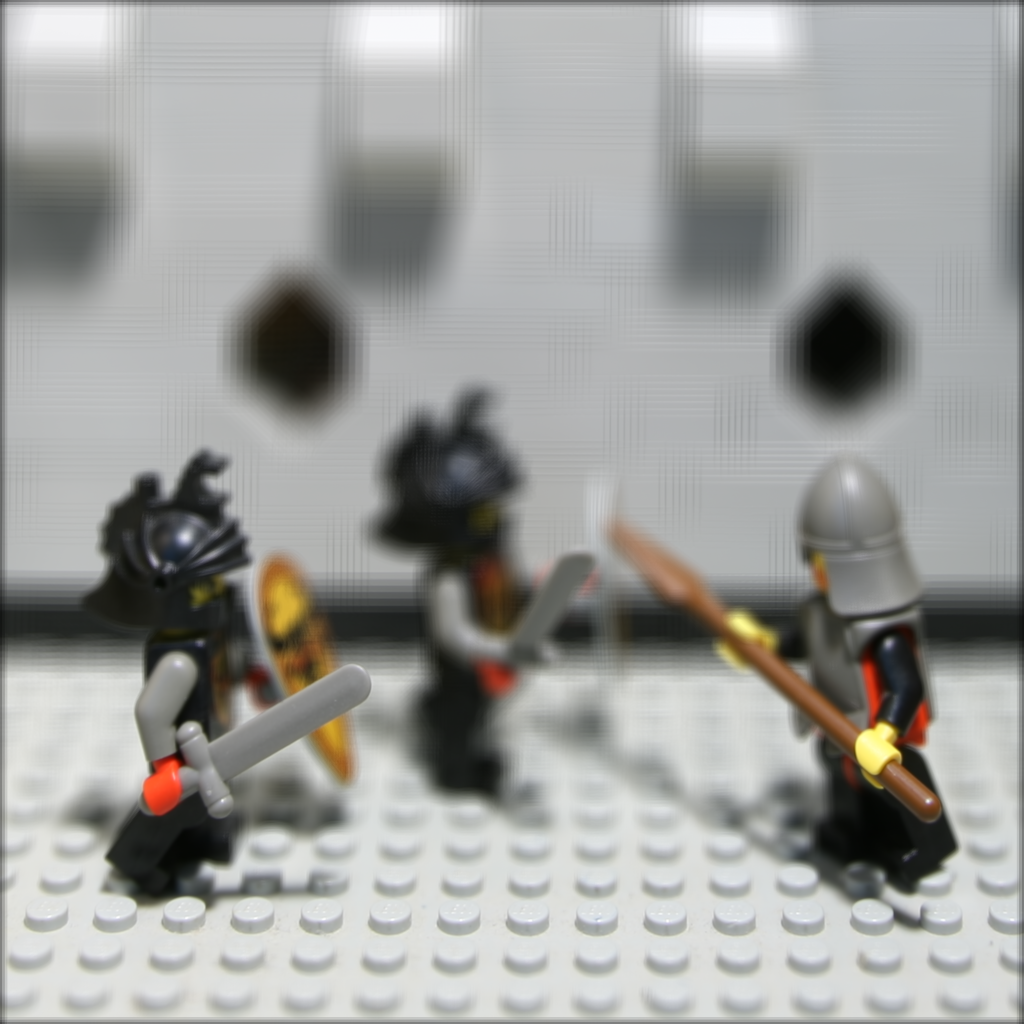

In [121]:
#Refocus
calPic(0.1, 4)
calPic(0.2, 4)
calPic(0.3, 4)
calPic(0.4, 4)
calPic(0.5, 4)
calPic(0.0, 4)
calPic(-0.1, 4)
calPic(-0.2, 4)
calPic(-0.3, 4)